In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from childes_mi.utils.paths import CHILDES_DFS, DATA_DIR
from childes_mi.utils.general import flatten

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.autonotebook import tqdm

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [5]:
transcript_df = pd.read_pickle(CHILDES_DFS/'childes_df.pickle')
#transcript_df['dataset'] = [i[0].split('/')[11] for i in transcript_df.transcript_xml.values]
len(transcript_df)

123175

In [6]:
# mask for only a subset of corpuses
possible_corpuses = [
    # carterette is also transcribed in IPA
    "Carterette",  # 1st, 3rd, 5th grade, adults, speech naturalistic speech in IPA https://childes.talkbank.org/access/Eng-NA/Carterette.html
    "Gillam",  # normal subset, spontaneous storytelling 5-11y11m https://childes.talkbank.org/access/Clinical-MOR/Gillam.html
    "Braunwald",  # single subject from 1-6yo talking to family https://childes.talkbank.org/access/Eng-NA/Braunwald.html
    "Brown",  # 1y6m-5y1m, 3 subjects naturalistic talking to parents https://childes.talkbank.org/access/Eng-NA/Brown.html
    "EllisWeismer",  # 2y6m - 5y6 naturalistic play-oriented talk with instructor # https://childes.talkbank.org/access/Clinical-MOR/EllisWeismer.html
    "Gleason",  # 2;1 - 5;2 family interactions https://childes.talkbank.org/access/Eng-NA/Gleason.html
    "NH",# Nicholas-NH,  # 1;0-4;0, videotaped play with parent https://childes.talkbank.org/access/Clinical-MOR/Nicholas/NH.html
    "Post",  # 1;7-2;8 60m session with family and toys https://childes.talkbank.org/access/Eng-NA/Post.html
    "Normal",  #  Rondal-Normal 3-12yo free play with mother and child https://childes.talkbank.org/access/Clinical-MOR/Normal /Normal.html
]
corpus_mask = [corpus in possible_corpuses for corpus in transcript_df.corpus.values]
transcript_df = transcript_df[corpus_mask]

In [7]:
# mask for a subset of roles
possible_roles = ['Target_Child', 'Child']
role_mask = [role in possible_roles for role in transcript_df.role.values]
transcript_df = transcript_df[role_mask]
len(transcript_df)

2785

In [8]:
transcript_df[:3]

,PID,lang,corpus,date,participant_key,role,age,language,sex,POS,words,morphemes,transcript_xml,n_words,n_morphemes,n_POS
72301,11312/c-00015848-1,eng,Carterette,1984-01-01,CHI,Target_Child,P6Y,eng,NaN,"[[pro:per, v, , , conj, n:prop, coord, pro:ind...","[[you, mean, uh, um, like, England, or, someth...","[[you, mean, uh, um, like, England, or, someth...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,2102,2102,2102
72302,11312/c-00015847-1,eng,Carterette,1984-01-01,CHI,Target_Child,P10Y,eng,NaN,"[[co, , pro:sub, v, , det:num, n], [coord, , p...","[[well, um, I, have, uh, one, sister], [and, u...","[[well, um, I, have, uh, one, sister], [and, u...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,2729,2729,2729
72303,11312/c-00015849-1,eng,Carterette,1984-01-01,CHI,Target_Child,P8Y,eng,NaN,"[[v, n, n], [co, n:prop, v, prep, det:art, n, ...","[[lets, watch, tv], [well, Nancy, said, for, t...","[[let-3S, watch, tv], [well, Nancy, say-PAST, ...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,2019,2019,2019


In [9]:
print(transcript_df.corpus.unique())

['Carterette' 'Brown' 'Braunwald' 'Post' 'Gleason' 'Normal' 'Gillam'
 'EllisWeismer' 'NH']


In [10]:
print("there are {} words in this dataset".format(np.sum(transcript_df.n_words.values)))

there are 341548 words in this dataset


### Get child ages

In [11]:
import re
def convert_age(age_year):
    "Caclculate age in months from a string in CHILDES format"
    if age_year[-1] == 'Y':
        age_year += '0'
    m = re.match("P(\d+)Y(\d+)M?(\d?\d?)D?", age_year)
    age_month = int(m.group(1)) * 12 + int(m.group(2))
    try:
        if int(m.group(3)) > 15:
            age_month += 1
    # some corpora don't have age information?
    except ValueError as e:
        pass
    return age_month

In [12]:
transcript_df["age_months"] = [
    convert_age(i) if type(i) == str else np.nan for i in tqdm(transcript_df.age.values)
]

In [13]:
transcript_df["age_years"] = transcript_df["age_months"] / 12

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


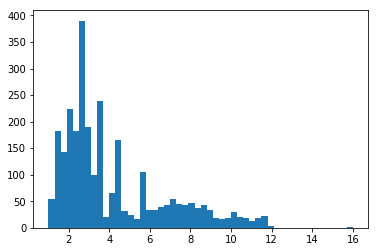

In [14]:
plt.hist(transcript_df.age_years.values, bins = 50);

In [15]:
transcript_df[:3]

,PID,lang,corpus,date,participant_key,role,age,language,sex,POS,words,morphemes,transcript_xml,n_words,n_morphemes,n_POS,age_months,age_years
72301,11312/c-00015848-1,eng,Carterette,1984-01-01,CHI,Target_Child,P6Y,eng,NaN,"[[pro:per, v, , , conj, n:prop, coord, pro:ind...","[[you, mean, uh, um, like, England, or, someth...","[[you, mean, uh, um, like, England, or, someth...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,2102,2102,2102,72.0,6.0
72302,11312/c-00015847-1,eng,Carterette,1984-01-01,CHI,Target_Child,P10Y,eng,NaN,"[[co, , pro:sub, v, , det:num, n], [coord, , p...","[[well, um, I, have, uh, one, sister], [and, u...","[[well, um, I, have, uh, one, sister], [and, u...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,2729,2729,2729,120.0,10.0
72303,11312/c-00015849-1,eng,Carterette,1984-01-01,CHI,Target_Child,P8Y,eng,NaN,"[[v, n, n], [co, n:prop, v, prep, det:art, n, ...","[[lets, watch, tv], [well, Nancy, said, for, t...","[[let-3S, watch, tv], [well, Nancy, say-PAST, ...",[/mnt/cube/tsainbur/Projects/github_repos/chil...,2019,2019,2019,96.0,8.0


In [16]:
transcript_df.corpus.unique()

array(['Carterette', 'Brown', 'Braunwald', 'Post', 'Gleason', 'Normal',
       'Gillam', 'EllisWeismer', 'NH'], dtype=object)

In [17]:
age_cohorts = [[1, 1.5], [1.5, 2], [2, 2.5], [2.5, 3], [3, 20]]

In [20]:
row

PID                                               11312/c-00010311-1
lang                                                             eng
corpus                                                     Braunwald
date                                                      1972-07-31
participant_key                                                  CHI
role                                                    Target_Child
age                                                        P1Y05M11D
language                                                         eng
sex                                                           female
POS                [[co], [co], [adv], [], [pro:per, 0cop, n], []...
words              [[night_night], [night_night], [here], [xxx], ...
morphemes          [[night_night], [night_night], [here], [xxx], ...
transcript_xml     [/mnt/cube/tsainbur/Projects/github_repos/chil...
n_words                                                          230
n_morphemes                       

In [28]:
row.POS[0]

['pro:per', 'v', '', '', 'conj', 'n:prop', 'coord', 'pro:indef']

'pro:per v conj n:prop coord pro:indef'

In [35]:
row

PID                                               11312/c-00010311-1
lang                                                             eng
corpus                                                     Braunwald
date                                                      1972-07-31
participant_key                                                  CHI
role                                                    Target_Child
age                                                        P1Y05M11D
language                                                         eng
sex                                                           female
POS                [[co], [co], [adv], [], [pro:per, 0cop, n], []...
words              [[night_night], [night_night], [here], [xxx], ...
morphemes          [[night_night], [night_night], [here], [xxx], ...
transcript_xml     [/mnt/cube/tsainbur/Projects/github_repos/chil...
n_words                                                          230
n_morphemes                       

In [36]:
pos

[['co'],
 ['co'],
 ['adv'],
 [''],
 ['pro:per', '0cop', 'n'],
 [''],
 ['n:prop'],
 [''],
 ['n'],
 ['co'],
 ['pro:obj', 'n:prop'],
 ['adv'],
 ['unk'],
 ['co'],
 ['unk'],
 [''],
 ['adv'],
 ['n'],
 ['n'],
 ['adv'],
 ['unk', 'adv'],
 ['co'],
 ['adv'],
 ['mod~neg'],
 ['v'],
 ['pro:sub', 'v'],
 ['n:prop'],
 ['n'],
 ['adv'],
 ['0pro:sub', 'v', '', '', '', 'pro:dem'],
 [''],
 [],
 ['v', 'prep', 'n'],
 ['co'],
 ['co'],
 ['co'],
 [],
 [''],
 ['co'],
 [''],
 [''],
 [''],
 ['v', 'pro:per'],
 ['v', 'pro:per'],
 ['co'],
 ['adv'],
 ['n:prop'],
 [''],
 ['n'],
 ['n:prop'],
 ['adv'],
 ['co'],
 ['n'],
 ['n'],
 ['adv'],
 ['co'],
 ['n'],
 ['n'],
 ['n'],
 ['co'],
 ['co'],
 ['n:prop'],
 ['unk'],
 ['n'],
 ['co'],
 ['unk'],
 ['unk'],
 ['adv'],
 ['n'],
 ['bab'],
 [''],
 ['n'],
 [''],
 ['n'],
 ['co'],
 ['n'],
 ['n'],
 ['adv'],
 [''],
 ['on'],
 ['co'],
 ['co'],
 [''],
 ['on'],
 ['on'],
 ['pro:sub', 'v', 'adj', 'n', 'prep', 'pro:obj'],
 ['on'],
 [''],
 [],
 [''],
 [],
 [],
 ['n'],
 [''],
 ['n'],
 [''],
 [],
 ['co'

In [38]:
for (age_cohort_low, age_cohort_high) in tqdm(age_cohorts):
    cohort_subset = transcript_df[
        (transcript_df.age_months/12 >= age_cohort_low) & (transcript_df.age_months/12 < age_cohort_high)
    ]
    print("------Age: {}-{} | # transcripts: {}------\n ".format(age_cohort_low, age_cohort_high, len(cohort_subset)))
    
    for idx, row in cohort_subset.iterrows():
        trans = row.words
        pos = row.POS
        corpus_name = '/'.join(row.transcript_xml[0].split('/')[-3:])
        print("{} {} months".format(corpus_name, int(row.age_months)))
        for sent, rowpos in zip(trans, pos):
            sent = [word for word in sent if word != 'xxx']
            pos_str = ' '.join([i for i in rowpos if i is not ''])
            sent_str = ' '.join(sent)
            if len(sent) == 0:
                continue
            print("\t {} ({})".format(sent_str, pos_str))
        print('\n')
        break
    print('\n\n')

------Age: 1-1.5 | # transcripts: 125------
 
Eng-NA/Braunwald/010511.xml 17 months
	 night_night (co)
	 night_night (co)
	 here (adv)
	 it is night_night (pro:per 0cop n)
	 Daddy (n:prop)
	 spiders (n)
	 oh (co)
	 me Dwww (pro:obj n:prop)
	 on (adv)
	 on (unk)
	 no (co)
	 buttons (unk)
	 uh ()
	 down (adv)
	 water (n)
	 water (n)
	 there (adv)
	 dance there (unk adv)
	 ahhah (co)
	 on (adv)
	 don't (mod~neg)
	 give (v)
	 I want (pro:sub v)
	 Daddy (n:prop)
	 dance (n)
	 on (adv)
	 I want that that that that (0pro:sub v pro:dem)
	 eh ()
	 go in there (v prep n)
	 uhoh (co)
	 uhoh (co)
	 uhoh (co)
	 yeah (co)
	 thank you (v pro:per)
	 thank you (v pro:per)
	 yeah (co)
	 on (adv)
	 Cee (n:prop)
	 spider (n)
	 Cee (n:prop)
	 down (adv)
	 byebye (co)
	 car (n)
	 car (n)
	 there (adv)
	 byebye (co)
	 car (n)
	 car (n)
	 baby (n)
	 night_night (co)
	 night_night (co)
	 Cee (n:prop)
	 cookie (unk)
	 spoon (n)
	 oh (co)
	 down (unk)
	 down (unk)
	 there (adv)
	 recorder (n)
	 aya (bab)
	 door 

	 okay (co)
	 look (co)
	 look Daddy put it on a wall (v n:prop v pro:per prep det:art n)
	 Daddy put dat that on the wall (n:prop v pro:dem pro:dem prep det:art n)
	 call a g (v det:art n:let)
	 drop a b (v det:art n:let)
	 drop g (n n:let)
	 watch Urs (n n:prop)
	 okay watching (co part)
	 need a rubber (v det:art n)
	 where (pro:rel)
	 up dere there (prep n n)
	 in  (prep n)
	 look look (co co)
	 where my pocket (pro:rel det:poss n)
	 put in (v adv)
	 light (n)
	 my microph goes (det:poss n v)
	 my (det:poss)
	 where other dollar (pro:int qn n)
	 where go (pro:rel v)
	 where other them (pro:int qn pro:obj)
	 where others gone (pro:int n:pt part)
	 dere there other (adv adv qn)
	 dere there other found it (adv adv pro:indef v pro:per)
	 where other found other (pro:int qn v qn)
	 where it (pro:int pro:per)
	 have any more no (v qn pro:indef co)
	 here's a press a button (pro:exist~cop det:art n det:art n)
	 listen listen (v v)
	 press a button (v det:art n)
	 here's a chair (pro:exis

In [64]:
sent

['mm', 'yum']